In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [7]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

## Frequency Tables:  
Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [18]:
frequency_category = df['category'].value_counts()
frequency_category.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

## Visualizations:
Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

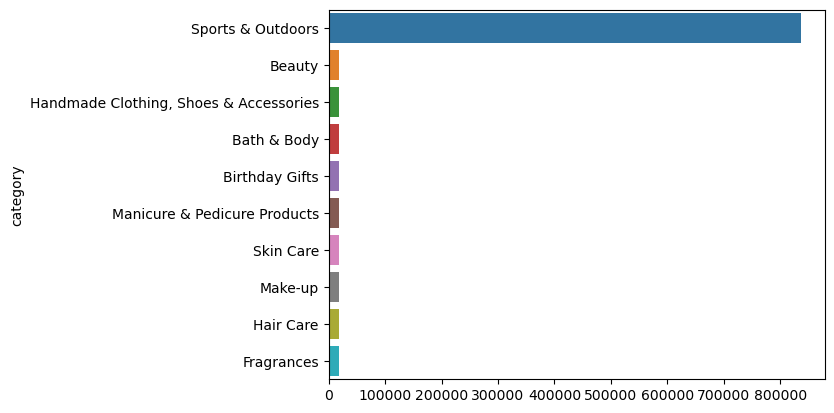

In [28]:
sns.barplot(y=frequency_category.head(10).index, x=frequency_category.head(10).values);

<Axes: ylabel='count'>

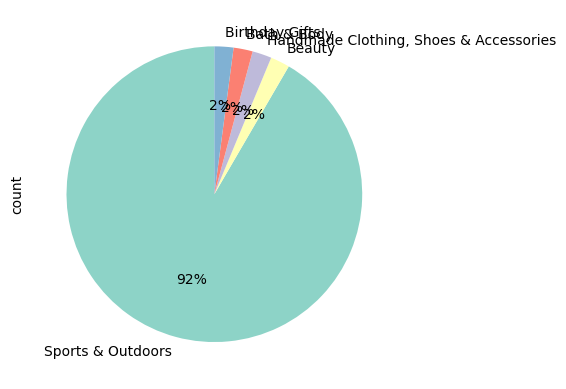

In [40]:
df['category'].value_counts().head(5).plot.pie(autopct='%1.0f%%', startangle=90, colors=sns.color_palette("Set3"))

'Sports and Outdoors' categories dominate the products listed with 92%

# Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

## Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [56]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]
mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

The average price of the products listed is 89.24, while the mode 9.99. This means that the most common price in the list of products is 9.99, much smaller than the average price. This indicates that there are many products priced at 9.99, but also there are some very expensive products, with very high prices, thus the average price is influenced by those very expensive products

## Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [61]:
variance_price = df['price'].var()
std_price = df['price'].std()
range_price = [df['price'].min(), df['price'].max()]
Q1_price = df['price'].quantile(q=0.25)
Q3_price = df['price'].quantile(q=0.75)
variance_price, std_price, range_price, Q1_price, Q3_price

(119445.48532256528, 345.60886175352226, [0.0, 100000.0], 9.99, 45.99)

The standard deviation in prices is about 345 and the range of prices is 100000, indicating that there is overall a high variance in prices.

## Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

C:\Users\salto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


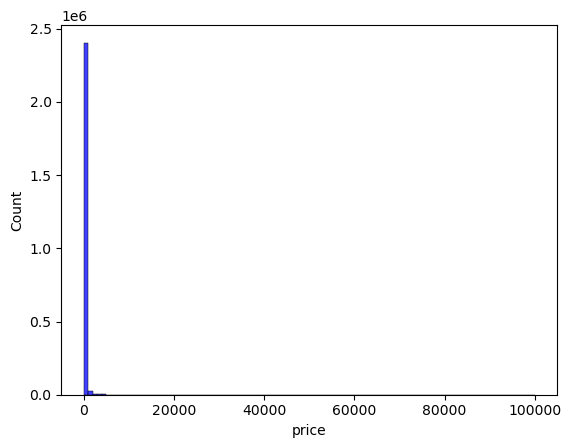

In [75]:
sns.histplot(df['price'], kde=False, bins=100, color="blue");

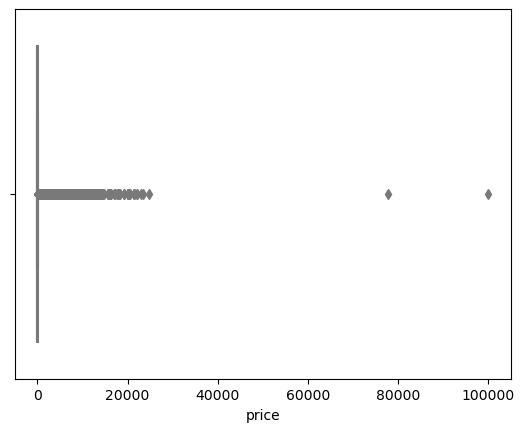

In [77]:
sns.boxplot(x = df['price'], color="lightblue");

# Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

## Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [84]:
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]
mean_stars, median_stars, mode_stars

(2.152836472966065, 0.0, 0.0)

## Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?


In [90]:
variance_stars = df['stars'].var()
std_stars = df['stars'].std()
range_stars = [df['stars'].min(), df['stars'].max()]
Q1_stars = df['stars'].quantile(q=0.25)
Q3_stars = df['stars'].quantile(q=0.75)
variance_stars, std_stars, range_stars, Q1_stars, Q3_stars

(4.81743402976196, 2.1948653785054697, [0.0, 5.0], 0.0, 4.4)

There is a large variation in rating, observed from the high standard devaition of 2.2 stars.

## Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [95]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

## Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

C:\Users\salto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


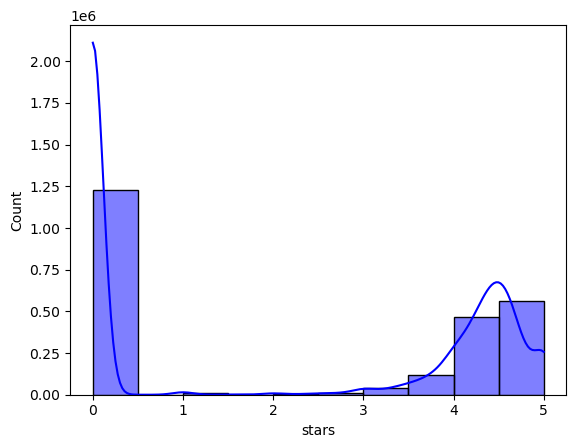

In [106]:
sns.histplot(df['stars'], kde=True, bins=10, color="blue");

From the histogram is evident that there are many products with rating 0 - 1 stars, which might though include products that have not been yet rated. Also the are many products that have rating between 4-5 stars. Assuming that the products with 0 stars, which is the most common rating in the dataset, have not been rated yet, in general customers rate high (4-5 stars) the products on Amazon UK.  